# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [2]:
import pandas as pd

In [3]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [4]:
standard.head()

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구


- 버스 정류장 데이터 - df_seoul_bus_station
- 유동인구 데이터 - df_seoul_moving
- 구별 상권 데이터 - df_seoul_business
- 구별 등록 인구 데이터 - df_seoul_people

In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep = ',', encoding = 'cp949')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep = ',', encoding = 'cp949')

UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 0: illegal multibyte sequence

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
display(df_seoul_bus_station.head())
display(df_seoul_moving.head())

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,21.349599,44.268203,9356120,19399831.60
1,11020,21.012462,44.547658,9306020,19729311.11
2,11030,21.364786,36.939485,8514380,14721271.37
3,11040,21.740324,42.720197,8887140,17463418.45
4,11050,22.474283,46.799489,8625540,17961456.49


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1  
승객수가 많은 곳에 정류장이 필요할 것이다.(df_seoul_bus_station)

* 가설 2   
승객수가 많은 곳에 노선 증설이 필요할 것이다.(df_seoul_bus_station)

* 가설 3  
노선수가 많은 곳에 정류장 증설이 필요할 것이다.(df_seoul_bus_station)

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [7]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

In [8]:
# Nan 존재 여부
df_seoul_bus_station.isna().sum()

자치구        0
정류장수       0
노선수        0
승차총승객수     0
하차총승객수     0
승차평균승객수    0
하차평균승객수    0
dtype: int64

In [9]:
# 수치확인
df_seoul_bus_station.describe()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
count,25.000000,25.000000,2.500000e+01,2.500000e+01,25.000000,25.000000
mean,424.600000,72.920000,4.912037e+06,4.800701e+06,115.718291,113.031529
std,106.279506,23.808122,1.421263e+06,1.400538e+06,17.080840,16.865744
min,178.000000,21.000000,2.749448e+06,2.746738e+06,87.403863,86.214261
25%,349.000000,56.000000,3.792541e+06,3.740923e+06,103.907639,101.235343
50%,435.000000,71.000000,4.942197e+06,4.730992e+06,119.235615,115.324511
75%,499.000000,94.000000,5.641742e+06,5.603488e+06,126.687777,122.418028
max,602.000000,107.000000,8.030483e+06,7.792476e+06,154.753674,157.516040


In [10]:
# 정보확인
df_seoul_bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구      25 non-null     object 
 1   정류장수     25 non-null     int64  
 2   노선수      25 non-null     int64  
 3   승차총승객수   25 non-null     int64  
 4   하차총승객수   25 non-null     int64  
 5   승차평균승객수  25 non-null     float64
 6   하차평균승객수  25 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.5+ KB


In [11]:
# 데이터 추가
df_seoul_bus_station['총승객수'] = df_seoul_bus_station['승차총승객수'] + df_seoul_bus_station['하차총승객수']

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


### 1) 승객수가 많은 곳에 정류장 증설이 필요할 것이다.(df_seoul_bus_station)
- target : 정류장수 / - feature : 총승객수  
- 시각화 : scatterplot
- 수치화 : pearsonr (p-value)

### 2) 승객수가 많은 곳에 노선 증설이 필요할 것이다.(df_seoul_bus_station)
- target : 노선수 / - feature : 총승객수  
- 시각화 : scatterplot
- 수치화 : pearsonr (p-value)

### 3) 노선수가 많은 곳에 정류장 증설이 필요할 것이다.(df_seoul_bus_station)
- target : 노선수 / - feature : 총승객수  
- 시각화 : scatterplot
- 수치화 : pearsonr (p-value)

## 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [12]:
plt.rc('font', family='Malgun Gothic')

### 1) 승객수가 많은 곳에 정류장 증설이 필요할 것이다.(df_seoul_bus_station)

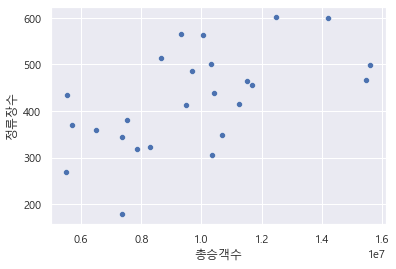

In [13]:
# 시각화
sns.scatterplot(x = '총승객수', y = '정류장수', data = df_seoul_bus_station)
plt.show()

In [14]:
# 수치화
import scipy.stats as spst

spst.pearsonr(df_seoul_bus_station['총승객수'], df_seoul_bus_station['정류장수'])

(0.5730226697878741, 0.002752973475733159)

### 2) 승객수가 많은 곳에 노선 증설이 필요할 것이다.(df_seoul_bus_station)

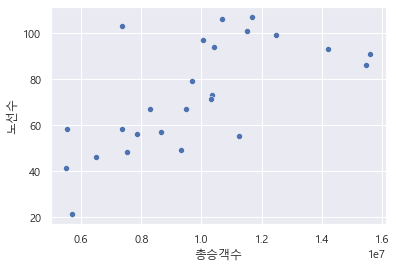

In [15]:
# 시각화
sns.scatterplot(x = '총승객수', y = '노선수', data = df_seoul_bus_station)
plt.show()

In [16]:
# 수치화
import scipy.stats as spst

spst.pearsonr(df_seoul_bus_station['총승객수'], df_seoul_bus_station['노선수'])

(0.6596714851091888, 0.00033402677594492004)

### 3) 노선수가 많은 곳에 정류장 증설이 필요할 것이다.(df_seoul_bus_station)

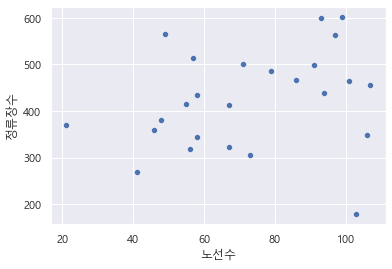

In [17]:
# 시각화
sns.scatterplot(x = '노선수', y = '정류장수', data = df_seoul_bus_station)
plt.show()

In [18]:
# 수치화
import scipy.stats as spst

spst.pearsonr(df_seoul_bus_station['노선수'], df_seoul_bus_station['정류장수'])

(0.25879843303095595, 0.2116069696436893)

In [19]:
df_seoul_bus_station.corr()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총승객수
정류장수,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.573023
노선수,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,0.659671
승차총승객수,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,0.999165
하차총승객수,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,0.999140
승차평균승객수,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,0.537242
하차평균승객수,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,0.551699
총승객수,0.573023,0.659671,0.999165,0.999140,0.537242,0.551699,1.000000


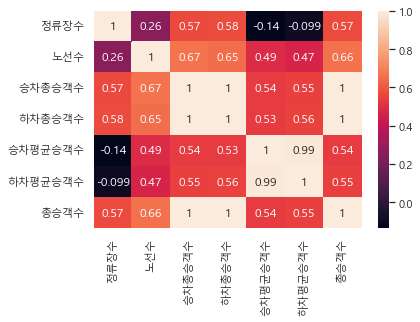

In [20]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
sns.heatmap(df_seoul_bus_station.corr(), annot = True)
plt.show()

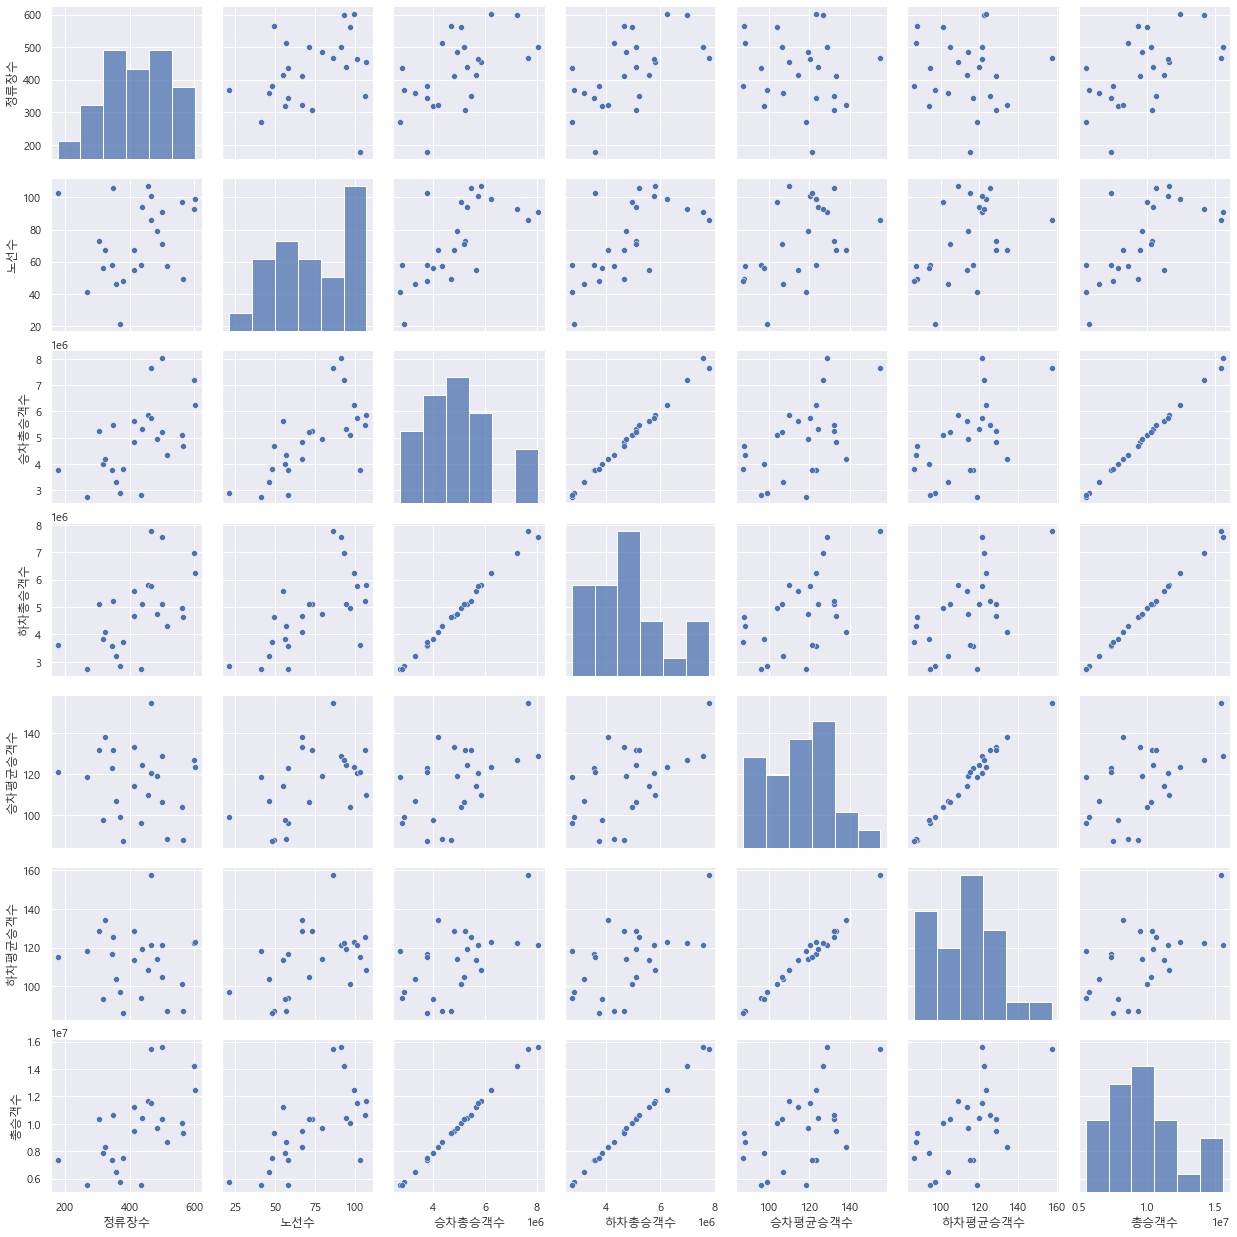

In [21]:
sns.pairplot(df_seoul_bus_station)
plt.show()

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

### 1)
정류장 대비 총 승객수가 많은 곳에 정류장 증설(df_seoul_bus_station)

In [27]:
df_seoul_bus_station['정류장당승객수'] = round(df_seoul_bus_station['총승객수'] / df_seoul_bus_station['정류장수'])
df_seoul_bus_station.sort_values(by = '정류장당승객수', ascending = False, inplace = True)
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총승객수,정류장대비총승객수,정류장당승객수
23,중구,178,103,3776675,3598932,121.020124,115.324511,7375607,0.000024,41436.0
10,동대문구,306,73,5240565,5115379,131.841430,128.692017,10355944,0.000030,33843.0
4,관악구,466,86,7655819,7792476,154.753674,157.516040,15448295,0.000030,33151.0
0,강남구,499,91,8030483,7569213,128.767927,121.371512,15599696,0.000032,31262.0
22,종로구,349,106,5468935,5205394,131.889620,125.534028,10674329,0.000033,30585.0


### 2)
노선수 대비 승객수가 많은 곳에 노선 증설(df_seoul_bus_station)

### 3)
정류장 대비 노선수가 많은 곳에 정류장 증설(df_seoul_bus_station)

### 4)
정류장 당 노선수가 적으면서 총 승객수가 많은 곳에 노선 증설(df_seoul_bus_station)

### 5)
정류장 대비 노선수가 많으면서 총 승객수도 많은 곳에 정류장 증설(df_seoul_bus_station)